In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('HR_Analytics.csv', sep=',', encoding='utf-8')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Selecionar apenas as características (excluindo a variável alvo)
feature_columns = [col for col in data.columns if col != 'Attrition']

# Atributos e alvo
X = data[feature_columns]
y = data['Attrition']

# Divisão dos dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
# Pipeline para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), X_train.select_dtypes(include=['object']).columns),
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64']).columns)
    ],
    remainder='passthrough'
)

In [6]:
# Definir hiperparâmetros para os modelos base
decisiontree_params = {
    'max_depth': 5, 
    'min_samples_split': 2, 
    'min_samples_leaf': 1,
}

randomforest_params = {
    'n_estimators': 100, 
    'max_depth': None, 
    'min_samples_split': 2, 
    'min_samples_leaf': 1, 
    'random_state': 42
}

gradientboosting_params = {
    'n_estimators': 100, 
    'learning_rate': 0.1, 
    'max_depth': 3, 
    'min_samples_split': 2, 
    'min_samples_leaf': 1, 
    'random_state': 42
}


In [9]:
# Instanciar os modelos base
base_models = [
    ('DecisionTree', DecisionTreeClassifier(**decisiontree_params)),
    ('RandomForest', RandomForestClassifier(**randomforest_params)),
    ('GradientBoosting', GradientBoostingClassifier(**gradientboosting_params))
]

meta_model = LogisticRegression()

In [10]:
# Instanciar o modelo de stacking
stacking_ensemble = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

In [11]:
# Pipeline completo com pré-processamento e modelo
model_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', stacking_ensemble)
    ]
)

In [12]:
# Treinar o modelo de stacking
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber'...
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object'))])),
                ('classifier',
                 StackingClassifier(estimators=[('DecisionTree',
                                                 DecisionTreeClassifier(max_depth=5)),
                                                ('RandomForest',
                                                 RandomForestClassifier(random_state=42)),
                                                ('GradientBoosting',
                                                 GradientBoostingClassifier(random_state=42))],
                                    final_estimator=LogisticRegression()))])

In [13]:
y_pred = model_pipeline.predict(X_test)

In [14]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8503401360544217
              precision    recall  f1-score   support

          No       0.87      0.96      0.92       370
         Yes       0.58      0.25      0.35        71

    accuracy                           0.85       441
   macro avg       0.73      0.61      0.63       441
weighted avg       0.82      0.85      0.82       441



Text(0.5, 1.0, 'Confusion Matrix')

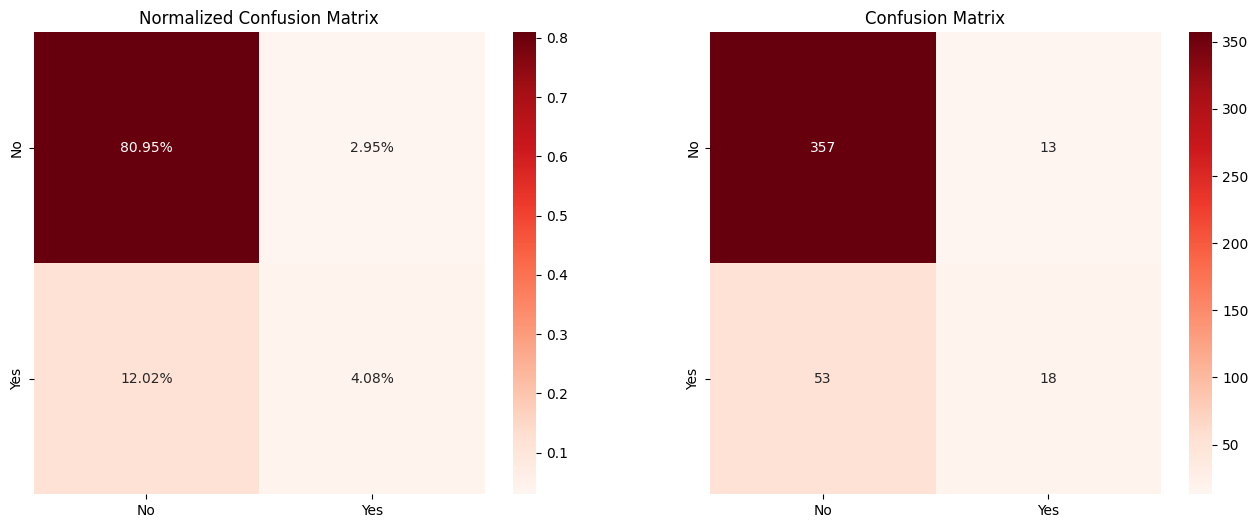

In [15]:
# Calcula a matriz de confusão normalizada
cm = confusion_matrix(y_test, y_pred)
cm_normalized = confusion_matrix(y_test, y_pred, normalize='all')

# Define a figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plota a matriz de confusão com as proporções
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axs[0])
axs[0].set_title('Normalized Confusion Matrix')

# Plota a matriz de confusão sem normalização
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axs[1])
axs[1].set_title('Confusion Matrix')
